In [22]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('NSE_data_all_stocks_2013.csv')

In [3]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,NaN,NaN,NaN,NaN
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,NaN
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,NaN,NaN,NaN,59.0
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,NaN,NaN,NaN,215.0
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",NaN


In [4]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
14884,31-Dec-13,SCOM,Safaricom Plc,23.5,33.5,10.8,10.95,10.85,10.85,NaN,NaN,"2,461,000",NaN
14885,31-Dec-13,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,172.4,172.4,172.4,172.84,-0.44,0.25%,NaN,NaN
14886,31-Dec-13,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,174.27,174.27,174.27,174.56,-0.29,0.17%,NaN,NaN
14887,31-Dec-13,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","4,926.97","4,926.97","4,926.97","4,874.29",52.68,1.08%,NaN,NaN
14888,31-Dec-13,^NASI,NSE All-Share Index,124.3,171.36,136.65,136.65,136.65,135.83,0.82,0.60%,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14889 entries, 0 to 14888
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       14889 non-null  object 
 1   CODE       14889 non-null  object 
 2   NAME       14889 non-null  object 
 3   12m Low    14889 non-null  object 
 4   12m High   14889 non-null  object 
 5   Day Low    14889 non-null  object 
 6   Day High   14889 non-null  object 
 7   Day Price  14889 non-null  object 
 8   Previous   14888 non-null  object 
 9   Change     9793 non-null   float64
 10  Change%    9790 non-null   object 
 11  Volume     11658 non-null  object 
 12  Adjust     4368 non-null   float64
dtypes: float64(2), object(11)
memory usage: 1.5+ MB


In [6]:
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14884,False,False,False,False,False,False,False,False,False,True,True,False,True
14885,False,False,False,False,False,False,False,False,False,False,False,True,True
14886,False,False,False,False,False,False,False,False,False,False,False,True,True
14887,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change        5096
Change%       5099
Volume        3231
Adjust       10521
dtype: int64

In [18]:
#fill missing values with 0
df = data.fillna(0)
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,0.00,0,0,0.0
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.50,6.25%,300,0.0
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,0.00,0,0,59.0
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,0.00,0,0,215.0
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.20,1.71%,"14,500",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14884,31-Dec-13,SCOM,Safaricom Plc,23.5,33.5,10.8,10.95,10.85,10.85,0.00,0,"2,461,000",0.0
14885,31-Dec-13,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,172.4,172.4,172.4,172.84,-0.44,0.25%,0,0.0
14886,31-Dec-13,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,174.27,174.27,174.27,174.56,-0.29,0.17%,0,0.0
14887,31-Dec-13,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","4,926.97","4,926.97","4,926.97","4,874.29",52.68,1.08%,0,0.0


In [17]:
df.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [31]:
df['NAME'].value_counts()

Eaagads Ltd                                 247
Sanlam Kenya Plc                            247
Kakuzi Plc                                  247
KenolKobil Ltd                              247
Kenya Electricity Generating Company Plc    247
                                           ... 
NSE All-Share Index                         239
NSE 20-Share Index                          227
I & M Holdings Plc                          128
Home Afrika Ltd                             114
Umeme Ltd                                   102
Name: NAME, Length: 62, dtype: int64

Text(0, 0.5, 'Adjust')

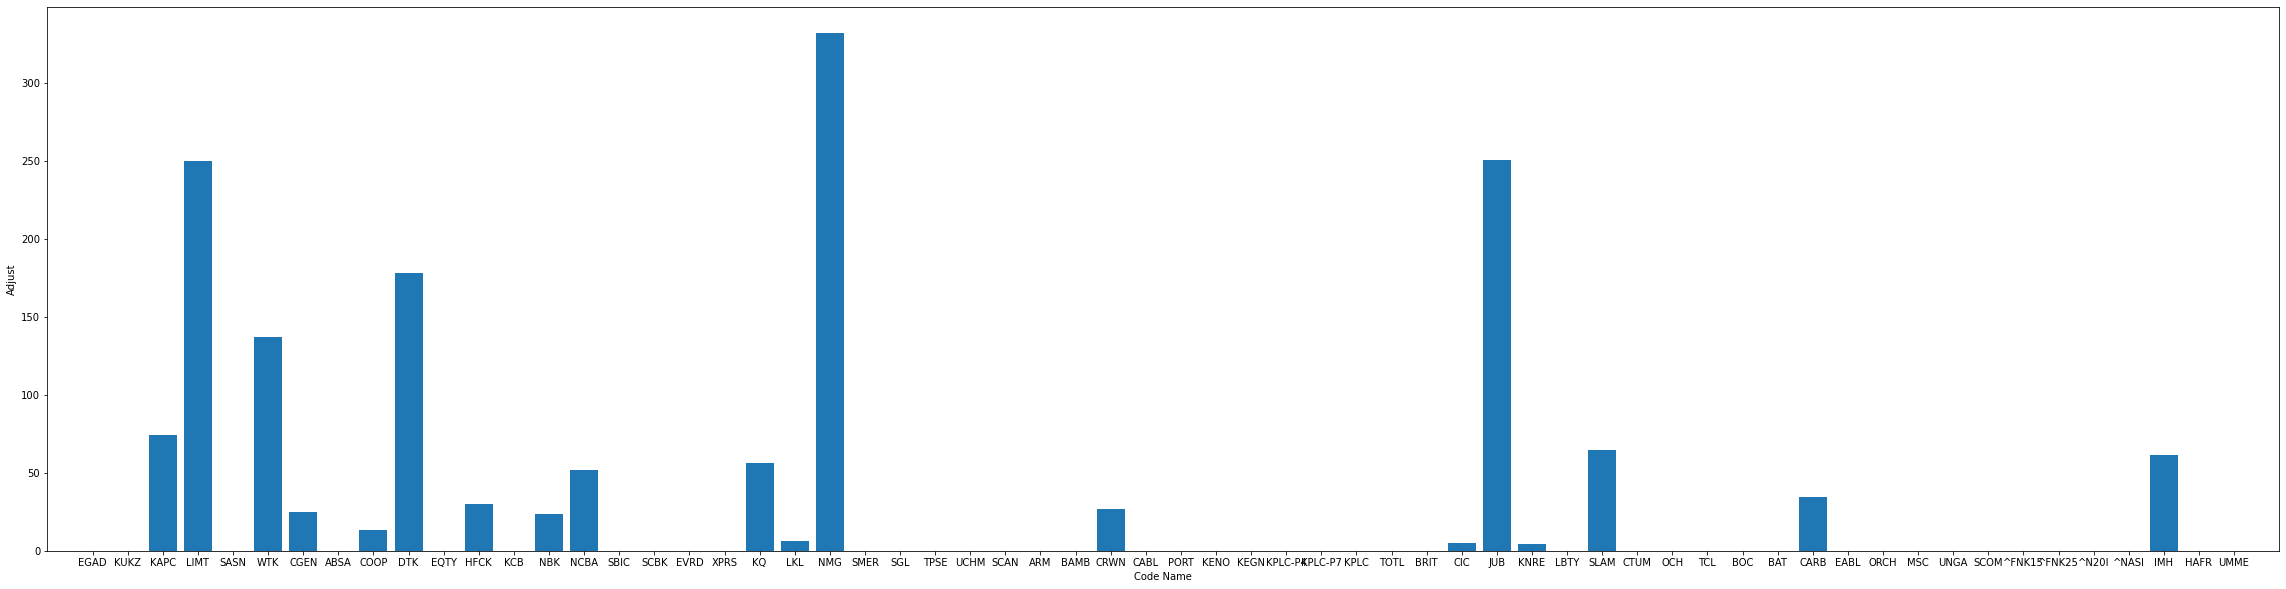

In [27]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Adjust'])
plt.xlabel('Code Name')
plt.ylabel('Adjust')

Text(0, 0.5, 'Change')

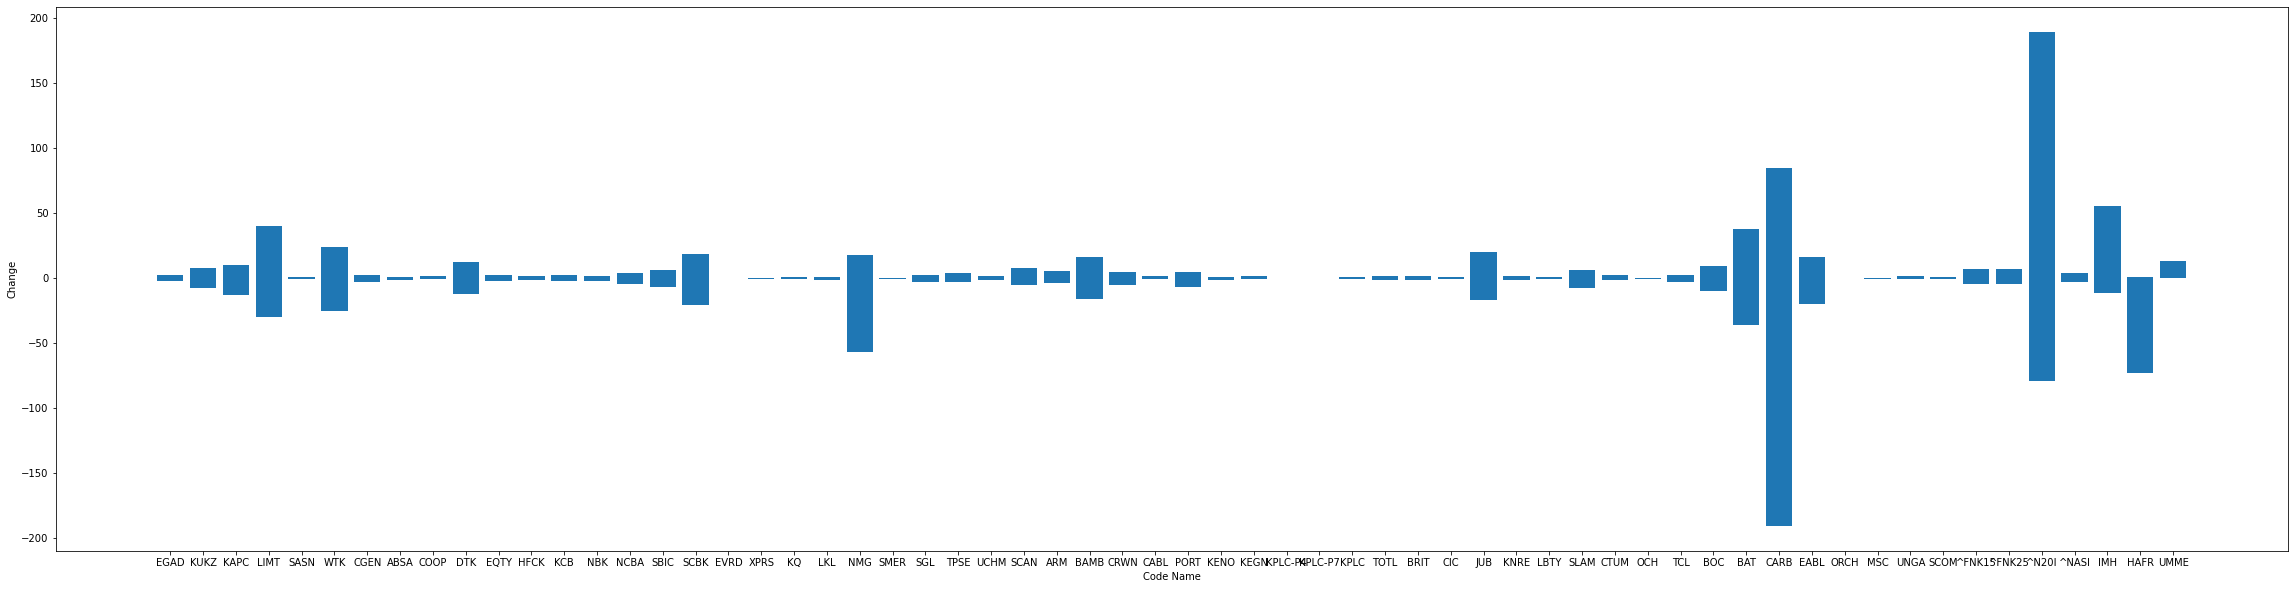

In [40]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Change'])
plt.xlabel('Code Name')
plt.ylabel('Change')

Text(0, 0.5, 'Change')

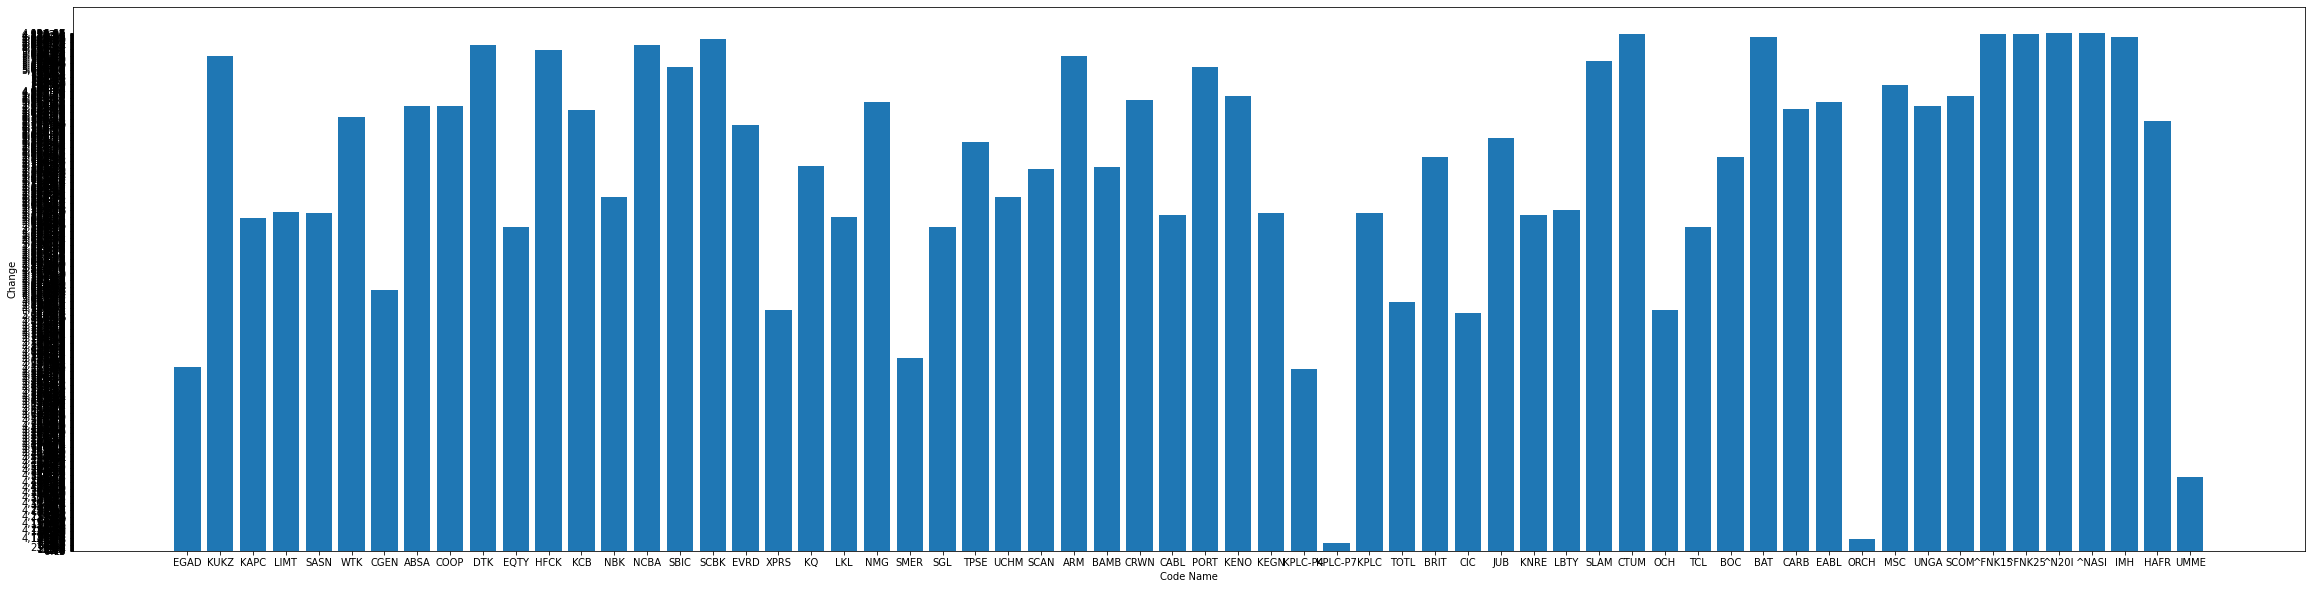

In [54]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Day Price'])
plt.xlabel('Code Name')
plt.ylabel('Change')

In [41]:
df.dtypes

DATE          object
CODE          object
NAME          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change       float64
Change%       object
Volume        object
Adjust       float64
dtype: object